Invariantin massan laskeminen

Tässä tehtävässä harjoitellaan laskemaan CMS-ilmaisimessa havaittujen hiukkasten invariantti massa. Invariantti massa on hiukkasfyysikoille tärkeä työkalu hiukkasten tunnistamisessa.

Mikä on invariantti massa?
Kun hiukkaskiihdyttimessä törmäytetään hiukkasia, vapautuu valtava määrä energiaa, josta muodostuu uusia hiukkasia. Jotkin törmäyksessä syntyneet hiukkaset, kuten esimerkiksi Higgsin hiukkanen, ovat hyvin lyhytikäisiä ja hajoavat muiksi hiukkasiksi kauan ennenkuin ne päätyvät hiukkasilmaisimen detektoreihin. Hajoamistuotteina syntyneet hiukkasia voidaan kuitenkin havaita, ja näiden ominaisuuksia mittaamalla voimme päätellä, mistä hiukkasesta ne olivat alunperin peräisin (ja löytää todisteet esimerkiksi Higgsin olemassaololle). CMS:n kaltainen laite voi mitata hiukkasten liikemäärää ja energiaa, joiden avulla voidaan laskea invariantti massa. Se on matemaattinen arvo joka on "invariantti" mittausympäristölle, eli se voidaan laskea missä ja mille tahansa. Jos sen kuitenkin laskee tietystä hajoamisesta syntyneille "tytärhiukkasille" saadaan arvo joka on lähellä emohiukkasen massaa. Esimerkiksi Higgsin hiukkanen voi hajota neljäksi myoniksi, joiden liikemäärän ja energian voimme mitata hiukkasilmaisimella. Näiden neljän myonin liikemäärästä ja energiasta voimme laskea invariantin massan, joka vastaisi Higgsin hiukkasen massaa, sillä myonit ovat peräisin Higgsistä.

Invariantti massa siis säilyy hiukkasen hajotessa uusiksi hiukkasiksi. Tämän ominaisuuden ansiosta se on voittamaton työkalu kokeellisen hiukkasfysiikan tutkijoille. Hiukkasilmaisin, kuten CMS, havaitsee lähinnä stabiileja hiukkasia. Määrittääkseen sen, minkä hiukkasen hajoamisesta nuo stabiilit hiukkaset ovat peräisin, tutkijoiden tulee tarkastella suuria datamääriä. Voimme laskea invariantin massan usealle eri hajoamistapahtumalle ja piirtää kaikista laskemistamme invarianteista massoista histogrammi. Lisätietoa englanniksi: https://profmattstrassler.com/articles-and-posts/particle-physics-basics/mass-energy-matter-etc/mass-and-energy/

Alla olevassa kuvassa on piirretty invariantin massan histogrammi sellaisista törmäyksistä, joissa hiukkasilmaisin on havainnut kaksi myonia. Piikit histogrammissa vastaavat emohiukkasta, josta myonit ovat peräisin.

Datan hakeminen
Tarkoituksenamme on piirtää invariantin massan histogrammi CMS:n avoimesta datasta vuodelta 2011. Dataan on valikoitu tapahtumia joissa syntyy kaksi myonia [1]. Data löytyy CERN:n Open Data Portaalista [2], ja sitä voi käyttää pd.read_csv()-funktiossa nimellä http://opendata.cern.ch/record/5206/files/Ymumu.csv. Histogrammin piirtämistä varten meidän tulee kuitenkin laskea jokaiselle tapahtumalle invariantti massa. Alustetaan lasku hakemalla käyttämämme data sekä tarvittavat Python-paketit.

In [20]:
# Haetaan tarvittavat paketit

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lue data yllä olevasta tiedostopolusta ja tallenna se muuttujaan data
data = pd.read_csv("http://opendata.cern.ch/record/5206/files/Ymumu.csv")

# Katso datan muutama ensimmäinen rivi käyttäen head()-funktiota
data.head()


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


Invariantin massan laskeminen
Invariantti massa voidaan laskea havaittujen hiukkasten energioiden ja liikemäärien avulla. Kahden hiukkasen tapauksessa invariantti massa on:

𝑀=sqrt[(𝐸1+𝐸2)^2−‖𝐩1+𝐩2‖^2],
missä ‖𝐩1+𝐩2‖=(𝑝𝑥1+px2)^2+(𝑝𝑦1+𝑝𝑦2)^2+(𝑝𝑧1+𝑝𝑧2)^2.

Laskussa voidaan käyttää apuna numpy-pakettia, jonka nimesimme yllä np:ksi. Numpyn avulla voimme mm. suorittaa matemaattisia komentoja, joista neliöjuurta (sqrt) tarvitsemme invariantin massan laskemisessa. Potenssiin kaksi on x**2

In [22]:
# Laske invariantti massa ja tallenna muuttujaan invariantti_massa
invariantti_massa = np.sqrt((data['E1']+data['E2'])**2-((data['px1']+data['px2'])**2+(data['py1']+data['py2'])**2+(data['pz1']+data['pz2'])**2))

In [23]:
# Tulosta näytölle muuttujan invariantti_massa viisi ensimmäistä riviä (vinkki: käytä head()-funktiota)

invariantti_massa.head()

0    11.553492
1     9.163692
2    10.539055
3    10.407772
4    10.170626
dtype: float64

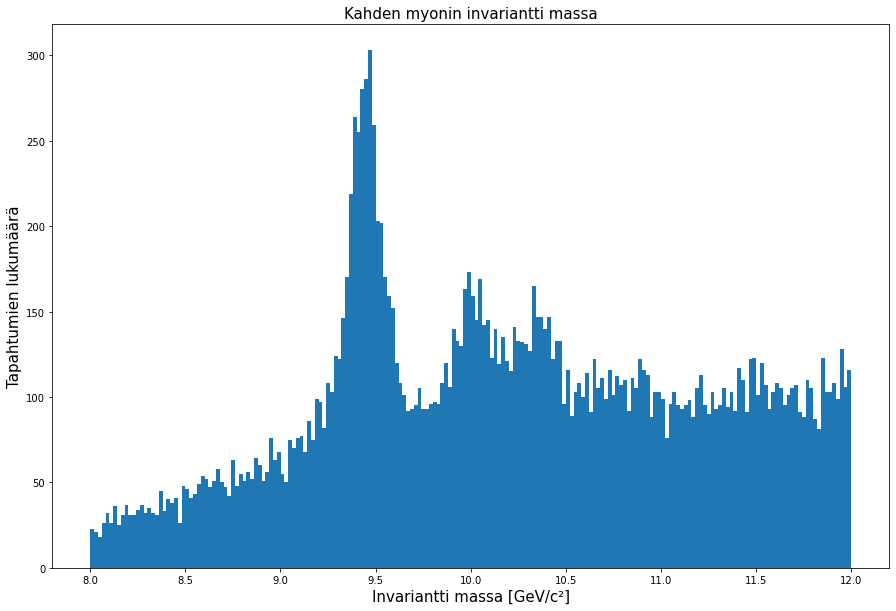

In [25]:
# Piirretään histogrammi kahden myonin invarianteista massoista 100 pylväällä
fig = plt.figure(figsize=(15, 10)) # Annetaan kuvan koko
plt.hist(invariantti_massa , bins=200)

# Näillä riveillä määritellään otsikko sekä akseleiden tekstit.
plt.xlabel('Invariantti massa [GeV/c²]', fontsize=15)
plt.ylabel('Tapahtumien lukumäärä', fontsize=15)
plt.title('Kahden myonin invariantti massa', fontsize=15)

# Näytetään kuvaaja
plt.show()

Korkein piikki n. 9.5 GeV/c^2. Olisko 
"The Upsilon meson (ϒ) is a quarkonium state (i.e. flavourless meson) formed from a bottom quark and its antiparticle. It was discovered by the E288 experiment team, headed by Leon Lederman, at Fermilab in 1977, and was the first particle containing a bottom quark to be discovered because it is the lightest that can be produced without additional massive particles. It has a lifetime of 1.21×10e−20 s and a mass about 9.46 GeV/c2 in the ground state.